# Stochastic Gradient Descent on Linear Regression

We learned a lot in this course about gradient descent, including why it's important and how to use scikit-learn to create models using the basic stochastic gradient descent algorithm. Now it's time to apply what you've learned so far about machine learning.

For this exercise, imagine you like to go to the gym; however, you hate getting to the gym and finding that it is so crowded that you must wait to use the machines you want.

Luckily, you have all the skills and knowledge to build a model that will help you predict the best time to go to the gym and avoid crowds, so you can enjoy a great workout with minimal wait times and no crowds.

Your task is to use the “Crowdedness at the Campus Gym” dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

Use the Pandas library to load the dataset into a DataFrame, run exploratory data analysis, and clean the dataset for training a model.

After cleaning the set, split the data into training and testing sets.

Then, you will use the --SDGRegressor-- from the Scikit Learn library to build and train a stochastic gradient descent linear regression model to predict how many people are at the gym on a given day from the features inputed.

Finally, you will evaluate the model and visualize the results using matplotlib.

This is a guided project, meaning we will take it one step at a time. It will include details on what you need to do for each step, it will give you some pointers and tips, and there will also be hints available if you get stuck.

Building projects is one of the fastest and best ways to learn data science, so take your time completing the project, and give yourself some time to try and figure it out before looking at the hints — this will make the learning experience much more rewarding in the end.

Above all, have fun! You are learning a new skill, which is always difficult. So enjoy the process, and you will enjoy the results even more.

In [1]:
##  Import Libraries and Load the Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
# Read File into DF
df = pd.read_csv('crowdness_gym_data.csv')

# Plots

Now I am ready to do some EDA (Exploratory Data Analysis).

I will start by doing Univariate Analysis on some of the features. This means we will take a deeper look at the distributions of specific features.

I will plot histograms for the month, day and hour, since they probably have the largest influence on the ammount of people.


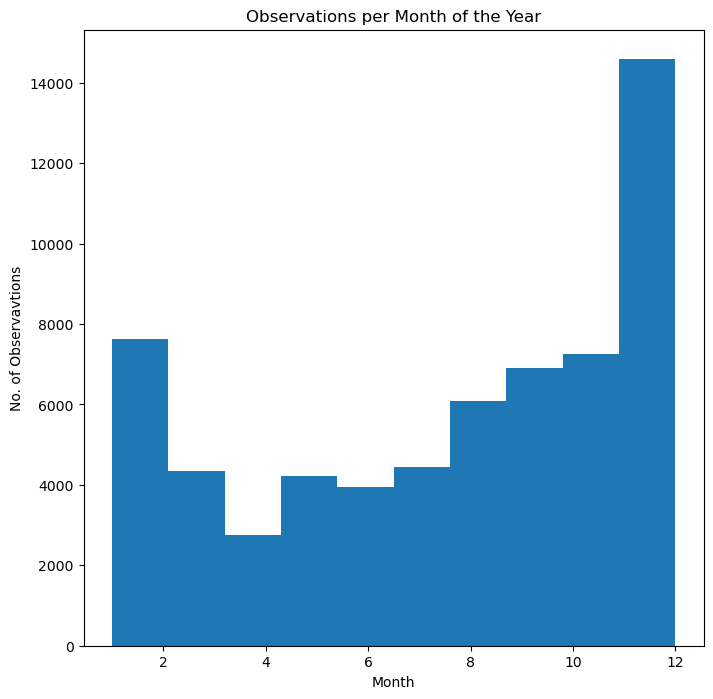

In [3]:
plt.figure(figsize=(8, 8))

plt.hist(df['month'])
plt.title("Observations per Month of the Year")
plt.xlabel('Month')
plt.ylabel('No. of Observavtions')
plt.show()
            

Here we can see that December and January are the months with the most observations, probably because they are the most popular months to go to the gym. We can also see more obervations at the begining of the semester (August), then at the end, probably because everyone is very excited at the beguning and very busy at the end (March, April).


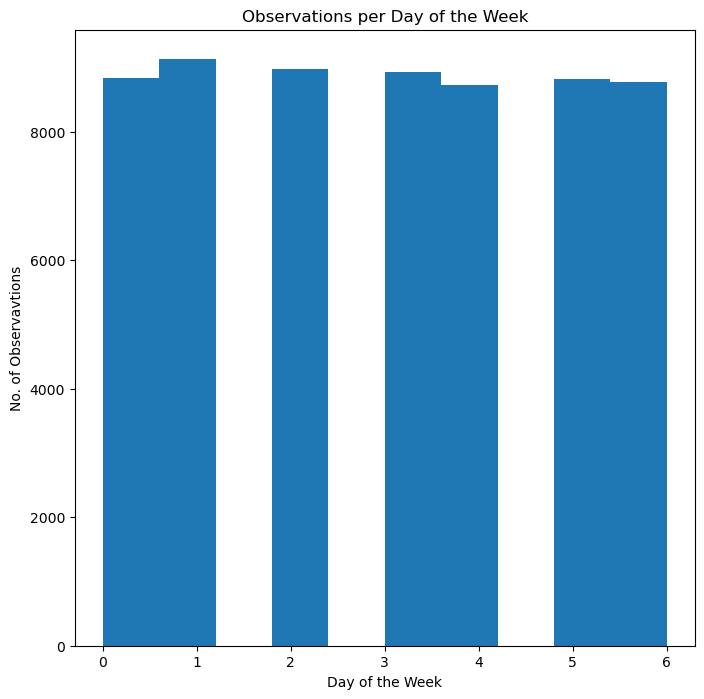

In [4]:
plt.figure(figsize=(8, 8))

plt.hist(df['day_of_week'])
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()

This one looks strange, but it sometimes happens with plots. 
Instead of fighting with it, I will replot it using the Seaborn library and a
ditribution plot.



<Figure size 800x800 with 0 Axes>

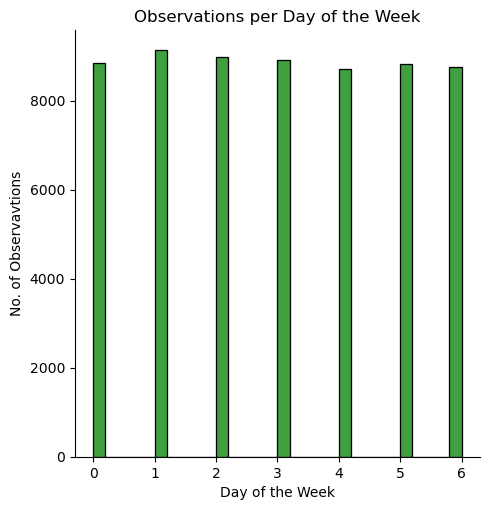

In [5]:
plt.figure(figsize=(8, 8))

sns.displot(df['day_of_week'], color='g')
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()


Not a lot of information here, except that there is not a huge diference in the number of observations for each day of the week. Tuesday (1) seems to be the most common day, but not by much.

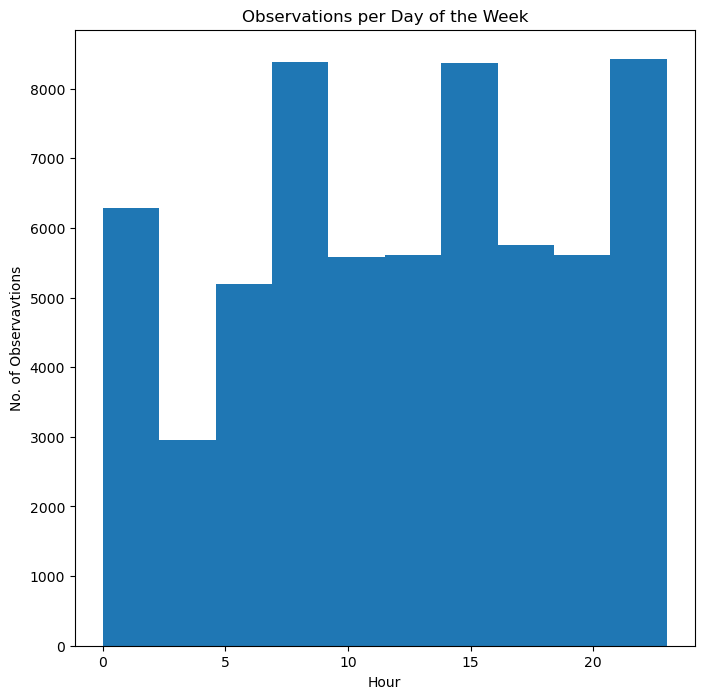

In [6]:
plt.figure(figsize=(8, 8))

plt.hist(df['hour'])
plt.title("Observations per Day of the Week")
plt.xlabel('Hour')
plt.ylabel('No. of Observavtions')
plt.show()

This is much more interesting, but just in case, there are a lot of observations at early morning and mid afternoon, which is expected, but the one at midnight are a surprise. Seems like there are night owls going to the gym.

This is interesting, but since I am building a model to predict the ammount of people (target variable), I can get more information from using Bivariate Analysis, meaning we confront two variables at the same time to see if there is any correlation between them.

Let's plot the relations between month, day and hour compared to the number of people.

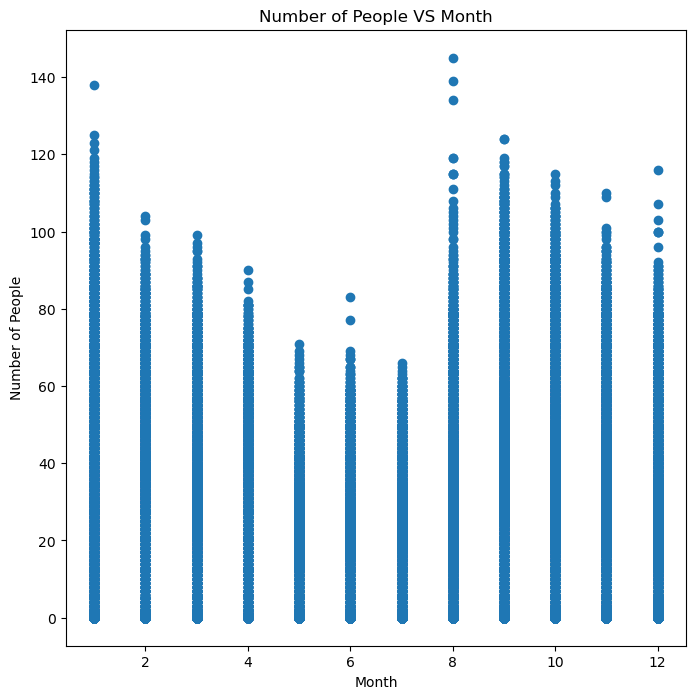

In [7]:
plt.figure(figsize=(8, 8))

plt.scatter(df['month'], df['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()

A clearer version of the relationship. We can see again that August and January are the months with the bigger peaks of people, and once again, that the begining of the semester has larger peaks than the end of it.

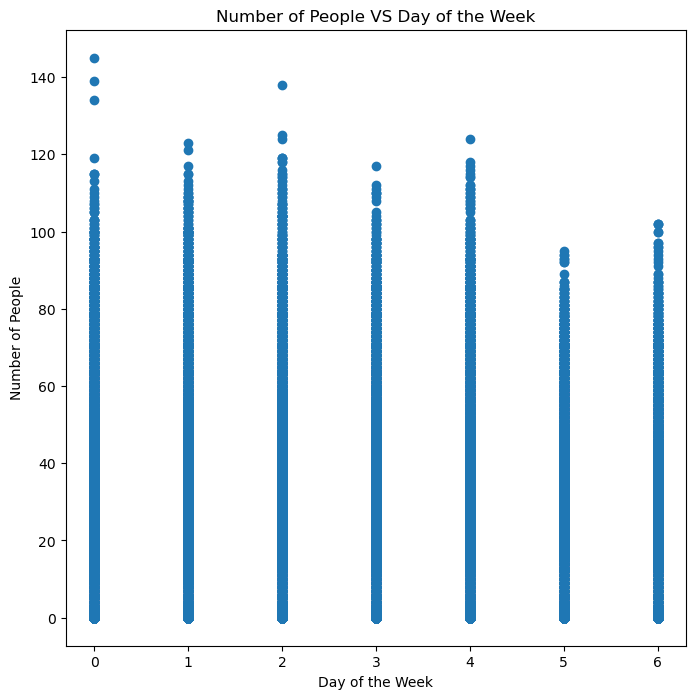

In [8]:
plt.figure(figsize=(8, 8))

plt.scatter(df['day_of_week'], df['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

Here we can now see the largest peaks on Monday and Wednesday. And the lower peaks on Saturdays.



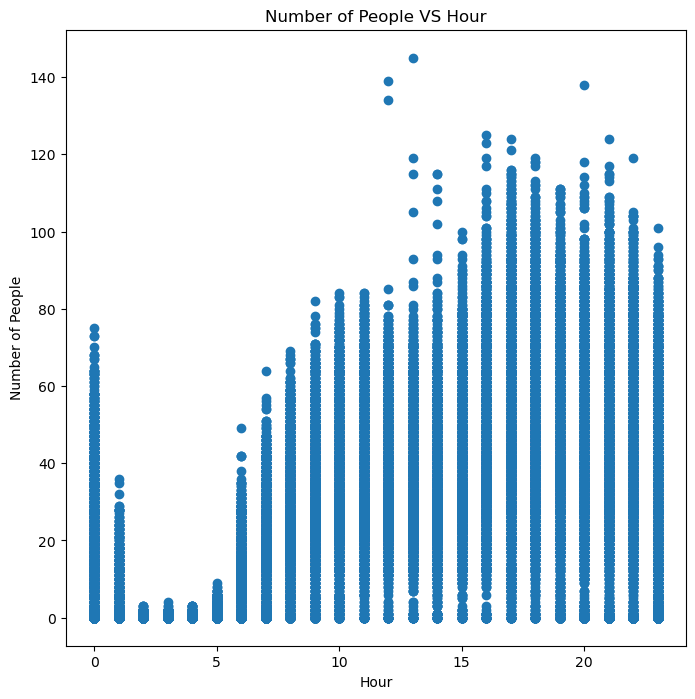

In [9]:
plt.figure(figsize=(8, 8))

plt.scatter(df['hour'], df['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

Now we can see a lot clearer, that the largest peaks of people are during the afternoon, evening, and still surprising, large peaks late at night. ALso we see very small peaks from 2am to 5am.

I can go on with each variable, but to make it short, I will use a set of tools, from correlation tables, pairplots and a heatmap, to quickly see the relationship between each variable and out target (number of people).

I will start with the Correlation Table.



In [10]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


This table gives is a sense of the correlation (positive or negative), between each factor and each other variable. Since we are mostly interested in the number of people, we can stick to the first column of the table.

We cans ee how the **hour, temperature** and interestingly the **is_during_semester** variables have the largest weight. Also we can see that the timestamp and hour variables have a very similar weight, wich means they could be redundant.

Other variables have weaker correlations as well, like **is_weekend** and **day_of_week** are negatively correlated which is very interesting.

Another way to look at this is to use pairplot() function on seaborn, since it gives you a scatterplot for each pair of variables. It can be harder to read than the table though, but it can help us see some interesting pattern emerge.

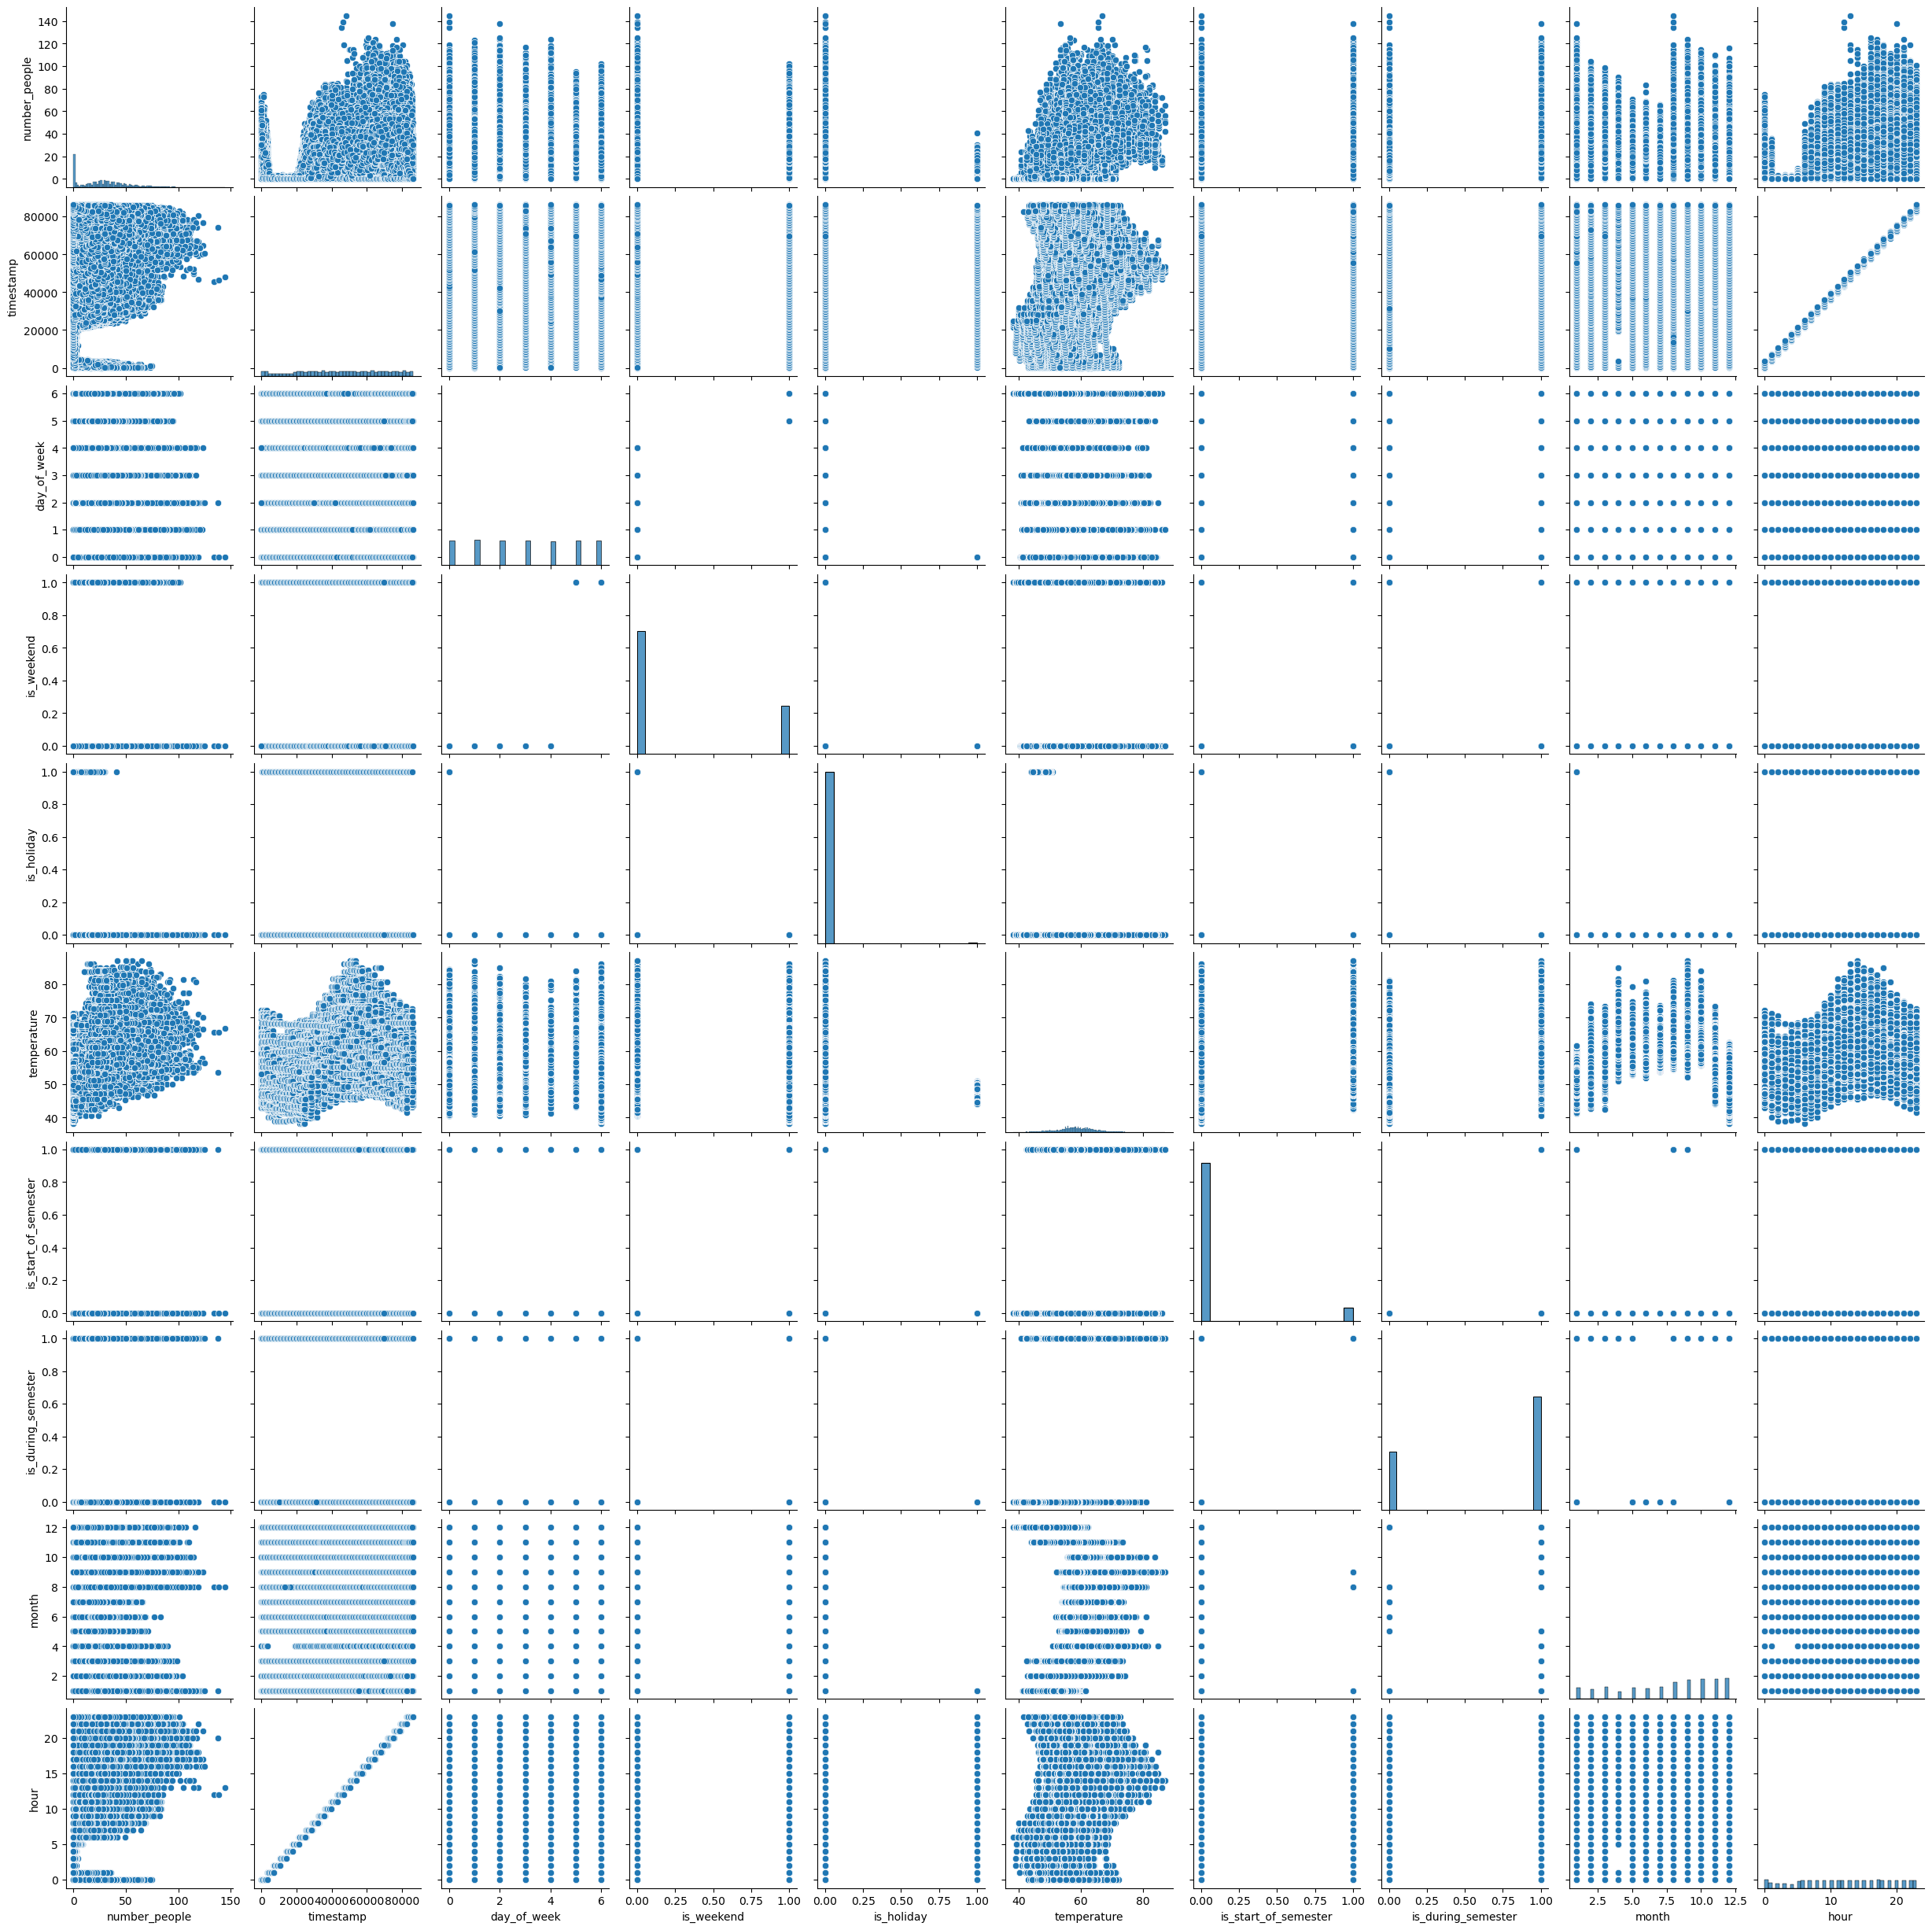

In [11]:
sns.pairplot(df)

<AxesSubplot:>

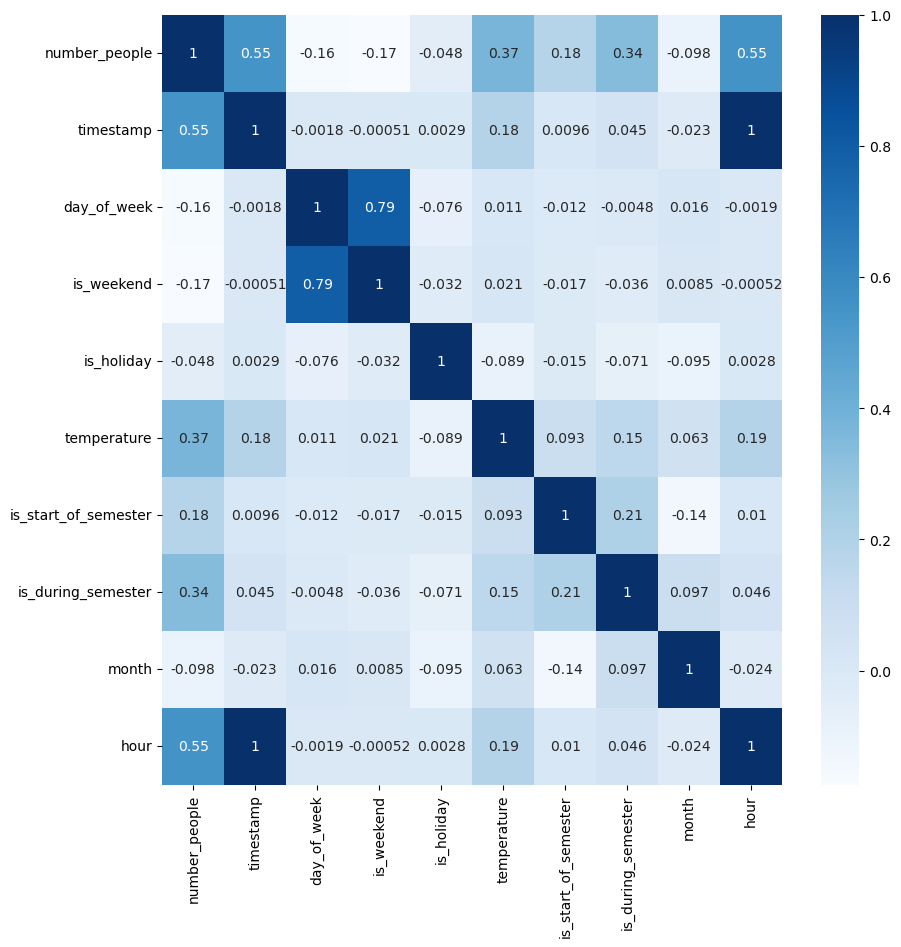

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')


This simply confirms our previous suspicions, that temperature, hour and is_during_semester variables are the most important.

Another thing, the timestamp seems to be redundant, since it has the same correlation as the hour, and we already have all the information on the month, day and time. So I will remove the timestamp column before moving on to building the model.

Also, check with .head() to make sure the column was removed.

In [13]:
df = df.drop('timestamp', axis=1)
df = df.drop('date', axis=1)
df.head()


,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


# Getting ready to build our model with Stochastic Gradient Descent

Now that the dataset is ready and we have our features, I need to import the tools needed to build the model. In this case, from the Scikit Lean library, the train_test_split and SGDRegressor.

I need to split the data into train and test sets. I am using a test size of 30% (70% of the data for training and 30% for testing). I am also setting the random state, so as to be able to replicate in the future.





In [14]:
data = df.values
X = data[:, 1:]
y = data[:, 0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print (X)
print (y)


[[ 4.  0.  0. ...  0.  8. 17.]
 [ 4.  0.  0. ...  0.  8. 17.]
 [ 4.  0.  0. ...  0.  8. 17.]
 ...
 [ 5.  1.  0. ...  1.  3. 19.]
 [ 5.  1.  0. ...  1.  3. 19.]
 [ 5.  1.  0. ...  1.  3. 19.]]
[37. 45. 40. ... 25. 18. 23.]


In [15]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")


Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


Build the model object with SGDRegressor. Setting the learning rate to optimal, the loss function to hubber loss and using elasticnet for the penalty.

The fitting the model with the training data. I set the random_state so as to be able to reproduce the training.

In [16]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

# Measure the Performance of the Model
Now that we have trained our model, it is time to predict the target variable with the test data. I will be using Mean Squared Error, Mean Absolute Error and R Sqared.



In [17]:
y_pred_v1 = sgd_v1.predict(X_test)  # Predict labels


In [18]:
# Let's evaluate the performance of the model.

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 254.545
R2 score: 0.506
Mean absolute error: 12.135


1Mean Squared Error and Mean Absolute Error are fairly high (the closer to 0 the higher the accuracy), meaning the model is not incredibly accurate. With the R2 Score we can see there is a correlation of 0.506, wich is not terrible, but not that good either since we want it to be as close to 1 as possible.

To try and imprive the model, we can scale the features to normalize them from -1 to 1, this mught help improve the model. For this, I will import the StandardScaler from Scikit Learn.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we can build another model with the scaled data and see if we can improve it.

I am using the same random_state for consistent results.

In [20]:
sgd_v2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

sgd_v2.fit(X_train_scaled, y_train)


SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

In [21]:
y_pred_v2 = sgd_v2.predict(X_test_scaled)  # Predict labels


In [22]:
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 254.325
R2 score: 0.507
Mean absolute error: 12.049


With the scaled data, the model performs slightly better, decresing the Mean Squared Error and Mean Absolute Error and increasing the R2 score by 0.001.



# Visualizing the Results

To see how our model performs, the best way is to visualize it. Here is the plot from our first model, using line plots with the actual test data on the back and the predicted data on the front. The parts where the plots converge are the points where the model performed well, and the divergence in the plots is where the model performed poorly.




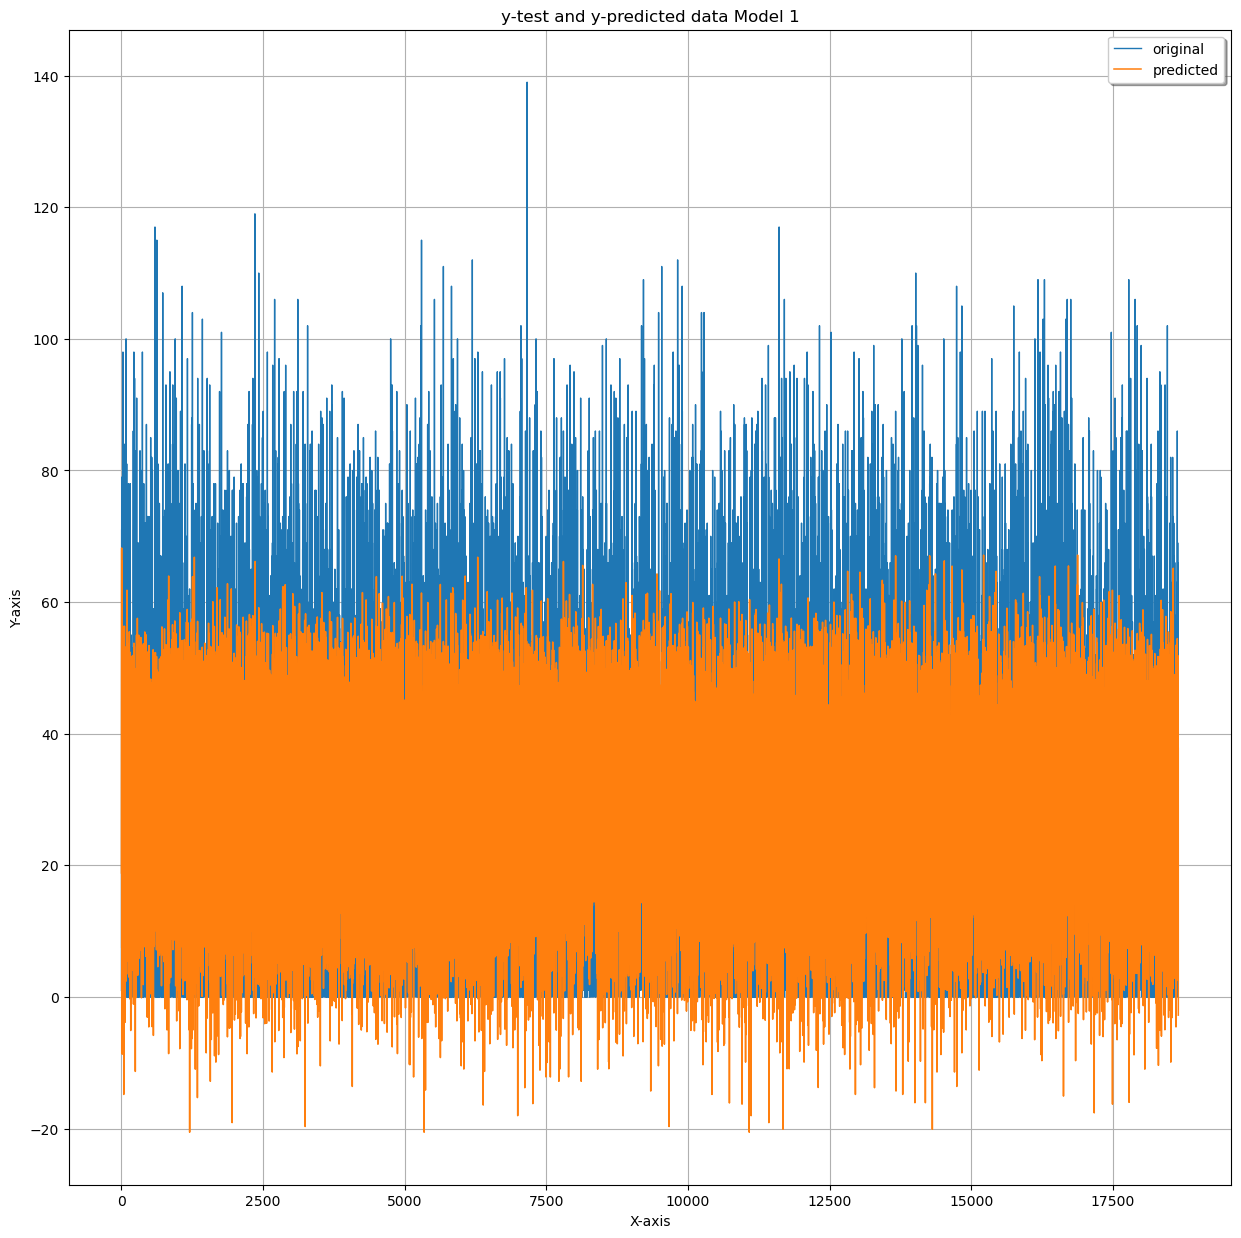

In [23]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v1, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 1")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

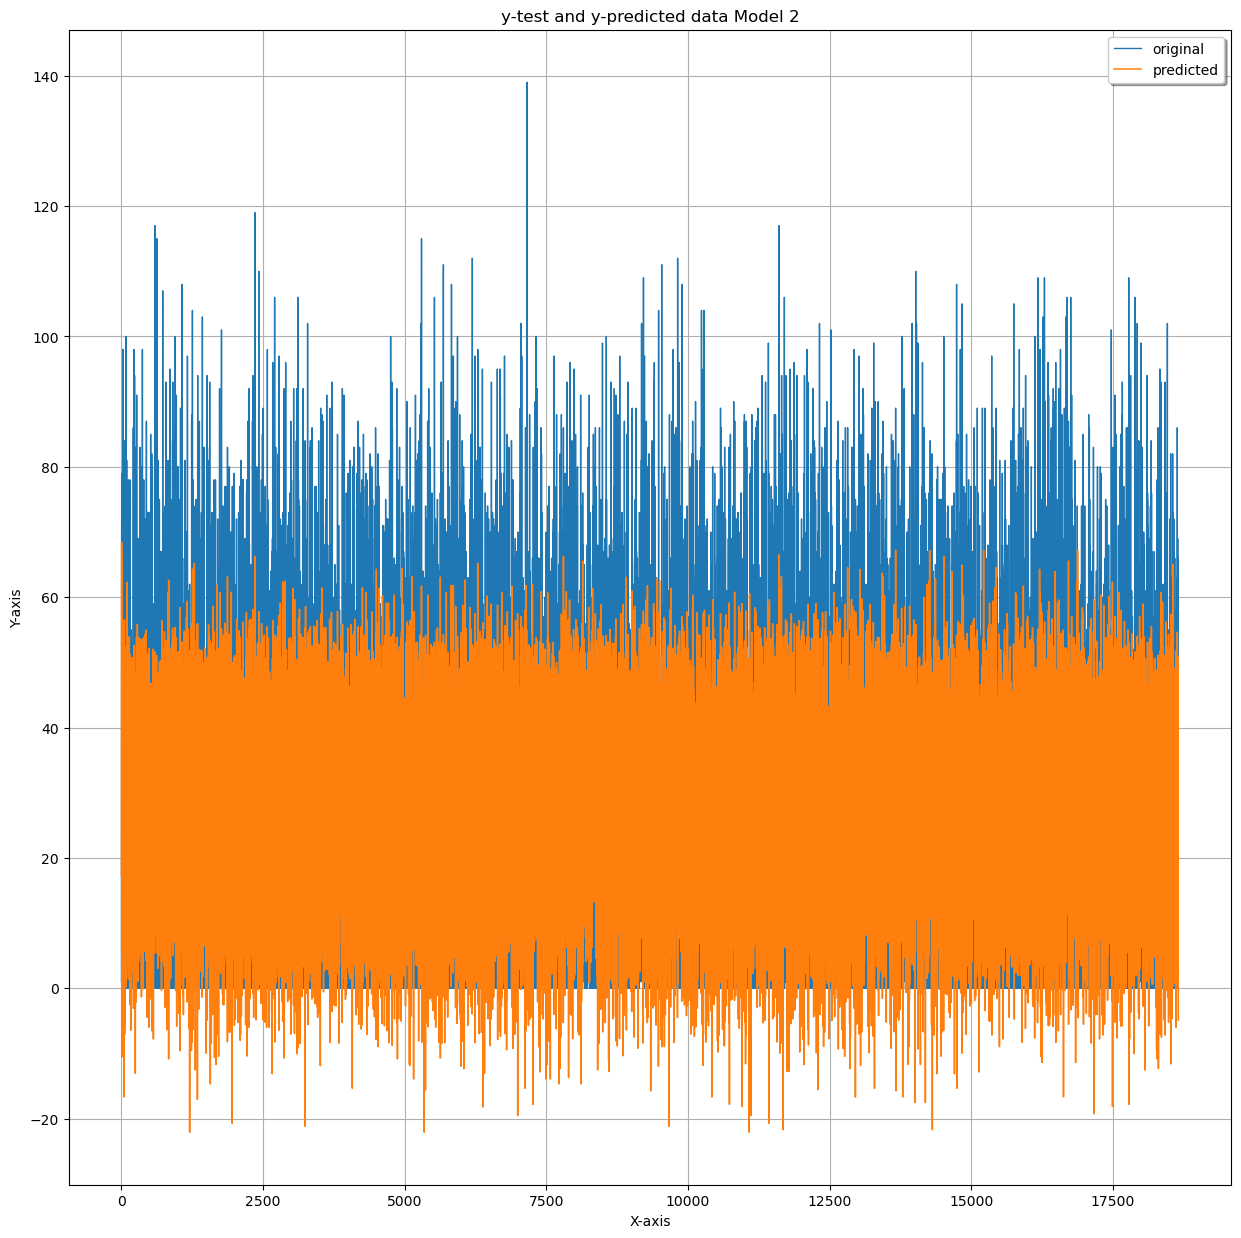

In [24]:
# Model v2

plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_v2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data Model 2")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# Summarize your Results

We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start for building such a prediction model.

We can improve the model by making some changes. Regarding the data, I decided to remove the timestamp variable since I believed it to be redundant, nonetheless, maybe that redundancy might help the model get higher accuracy.

Also, I might changing and testing other hyperparameters might be interesting, especially changing the loss function from huber to squared_epsilon_insensitive and maybe exploring changing the learning rate and penalty.

In general, from the data and the model, for someone like me who likes to go to the gym often without having too many people there, any day at 5am seems like a safe bet.